In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree 
from tabulate import tabulate
df = pd.read_csv("file1.csv")
df = df.drop(columns=["Unnamed: 0"])
df

,pred_prob,target
0,64.493744,0
1,230.011660,0
2,45.739296,0
3,497.197400,1
4,185.571260,1
...,...,...
8995,134.148790,0
8996,245.301650,0
8997,43.757065,0
8998,684.955260,1


In [24]:
model = DecisionTreeClassifier(random_state = 42, max_depth = 1)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .3)
model.fit(X_train,y_train)
threshold = model.tree_.threshold
print(threshold)


[426.84817505  -2.          -2.        ]


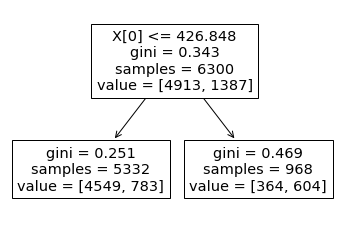

In [25]:
tree.plot_tree(model)
plt.show()

In [49]:
df.sort_values(by=['pred_prob'], ascending=True)

,pred_prob,target
2679,1.607435,0
7030,1.608369,0
1527,1.707324,0
2812,1.822869,0
8973,2.907140,0
...,...,...
1120,966.473940,1
1420,972.851300,1
1759,978.299130,1
7117,978.936340,1


In [50]:
df900 = df[df['pred_prob']>900] #900-1000
df1 = df[df['pred_prob']<=900]
df800 = df1[df1['pred_prob']>800] #800-900
df1 = df1[df1['pred_prob']<=800]
df700 = df1[df1['pred_prob']>700] #700-800
df1 = df1[df1['pred_prob']<=700]
df600 = df1[df1['pred_prob']>600] #600-700
df1 = df1[df1['pred_prob']<=600]
df500 = df1[df1['pred_prob']>500] #500-600

In [51]:
df900.to_csv('df900.csv')
df800.to_csv('df800.csv')
df700.to_csv('df700.csv')
df600.to_csv('df600.csv')
df500.to_csv('df500.csv')

In [52]:
#df900 = df900.drop(columns=["pred_prob"])
(df900['target']==0).sum()

7

In [54]:
table = [['Range', 'No of 0s', 'No of 1s'], 
         ['900-1000', (df900['target']==0).sum() , (df900['target']==1).sum()], 
         ['800-900', (df800['target']==0).sum(), (df800['target']==1).sum()]]
print(tabulate(table))

--------  --------  --------
Range     No of 0s  No of 1s
900-1000  7         35
800-900   41        149
--------  --------  --------


In [4]:
df['pred_prob'].quantile(np.linspace(.1, 1, 9, 0))

0.1     41.911010
0.2     64.695169
0.3     87.367775
0.4    111.518450
0.5    139.504960
0.6    174.483586
0.7    234.701719
0.8    336.829030
0.9    585.811937
Name: pred_prob, dtype: float64